In [28]:
import pickle as pk
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import os

result_random_file = "w_test_features=True_label_balance=False_results.p"
files = [result_random_file]

for k_sparse in ['5','10']:
    for noise in ['0.01','1','100']:
        files.append("K_sparsity="+k_sparse+"_label_balance=Greedy_noise="+noise+"_results.p")

print(files)
stats_dict = {}

['w_test_features=True_label_balance=False_results.p', 'K_sparsity=5_label_balance=Greedy_noise=0.01_results.p', 'K_sparsity=5_label_balance=Greedy_noise=1_results.p', 'K_sparsity=5_label_balance=Greedy_noise=100_results.p', 'K_sparsity=10_label_balance=Greedy_noise=0.01_results.p', 'K_sparsity=10_label_balance=Greedy_noise=1_results.p', 'K_sparsity=10_label_balance=Greedy_noise=100_results.p']


In [29]:
for file in  files:
    try:
        with open(file, 'rb') as f:
            stats_dict[file] = pk.load(f, encoding='latin1')
    except Exception as e:
        print(e)
        print("No " + tuple_var_file[0])
        
results_random = stats_dict[files[0]]['results']
#results_random = stats_dict[files[1]]['results']


In [35]:
def get_split_data(data,prefix_keys=''):
    data_plot_dict = {}
    for tup in data:
        if prefix_keys + tup[0] in data_plot_dict:
            data_plot_dict[prefix_keys + tup[0]]['x'].append(tup[1])
            data_plot_dict[prefix_keys + tup[0]]['y'].append(tup[2])
            data_plot_dict[prefix_keys + tup[0]]['err'].append(tup[3])
        else:
            data_plot_dict[prefix_keys + tup[0]] = {'x':[tup[1]], 'y':[tup[2]] ,'err':[tup[3]]}
        
    return data_plot_dict

blue_patch = mpatches.Patch(color='blue', label='noise = 0.01')
red_patch = mpatches.Patch(color='red', label='random gcnn')
black_patch = mpatches.Patch(color='black', label='noise = 1')
cyan_patch = mpatches.Patch(color='cyan', label='noise = 100')

plot_dict_display = {'0.01_gcn':('b',blue_patch),
                     'random_gcn':('r',red_patch),
                     '1_gcn':('k',black_patch),
                     '100_gcn':('c',cyan_patch)}


def plot_test(title, save_file,data_plot_dict, line_display_option='o-'):
    handles = []
    for model_to_plot in data_plot_dict.keys():
        display = plot_dict_display[model_to_plot][0]+line_display_option
        plt.errorbar(data_plot_dict[model_to_plot]['x'], data_plot_dict[model_to_plot]['y'],data_plot_dict[model_to_plot]['err'], fmt=display)
        handles.append(plot_dict_display[model_to_plot][1])
    plt.legend(handles=handles,loc=4)
    plt.plot(23,0.81,'ko')
    plt.xlabel('known labels of training set %')
    plt.ylabel('test accuracy')
    #plt.title(title)
    plt.grid(True)
    plt.savefig(os.path.join('../report',save_file), bbox_inches="tight")
    


{'random_gcn': {'err': [0.04974162816071976, 0.016572320361995501, 0.0065604970843990747, 0.00665133577000219, 0.0045782279087629909, 0.0058309565561438957, 0.0032863583283841637], 'y': [0.71359912157058714, 0.78939903974533077, 0.82159912586212158, 0.82239912748336796, 0.84379919767379763, 0.86199923753738406, 0.87199926376342773], 'x': [4, 9, 14, 19, 29, 50, 75]}, '1_gcn': {'err': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'y': [0.68399918079376221, 0.76499903202056885, 0.79799908399581909, 0.80799907445907593, 0.81899911165237427, 0.83699917793273926, 0.8479992151260376, 0.84999918937683105, 0.86499923467636108, 0.86199921369552612, 0.85699921846389771], 'x': [3, 6, 10, 13, 18, 24, 29, 34, 41, 45, 51]}, '100_gcn': {'err': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'y': [0.60199940204620361, 0.75399899482727051, 0.80299907922744751, 0.80799907445907593, 0.81799912452697754, 0.83699917793273926, 0.84999918937683105, 0.84999918937683105, 0.86499923467636108,

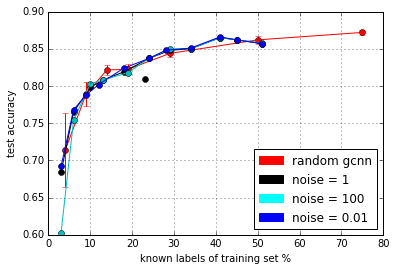

In [37]:

dict_plot = get_split_data(results_random, prefix_keys="random_")
i = 1
for k_sparse in ['5']:
    for noise in ['0.01','1','100']:
        dict_plot.update(get_split_data(stats_dict[files[i]]['results'], prefix_keys=noise+"_"))
        i+=1
print(dict_plot)

plot_test('Accuracy Random Sampling vs Greedy with Ksparsity=5','greedy_GCN_5.png',dict_plot)
